# **AN ANALYSIS INTO THE MOVIE INDUSTRY**

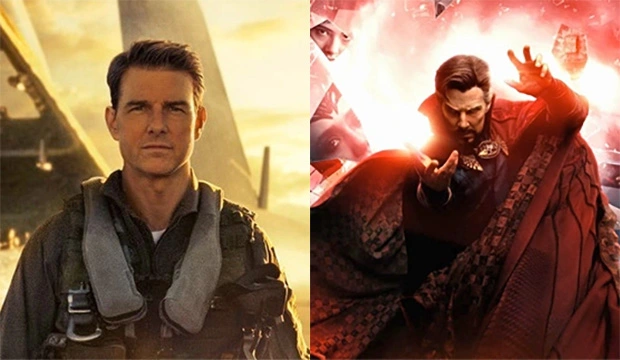

# **Project Overview**

This project aims to use exploratory data analysis to generate insights for a business stakeholder aiming to venture into a new line of business




# **Business Understanding**

Microsoft Corporation is an American multinational technology corporation which produces computer software, consumer electronics, personal computers, and related services. They are looking to diversify and venture into the movie scene by opening up a movie studio.Before making the big leap, they need to have a better understanding of the movie industry. To this end, I have been tasked with exploring what types of films are currently doing the best at the box office and then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what genre of films to produce.

# **PROBLEM STATEMENT**
The movie industry is without a doubt just as competitive and as dependent on internal and external factors as any other industry. A knowledge management system on the industry is therefore essential in order to navigate the industry successfully. The main challenge is the uncontrollability of the product, there is now way to predict how the audience will interact with it. This large financial gamble therefore necessitates an in-depth analysis on which genres of movies are preferred by majority of the audience and those that generate high returns on investments.

**import the neccessary modules/packages**

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **DATA UNDERSTANDING**

To understand the data, first open each of the data sets to see what they contain. This will guide on what data sets to use for our EDA.The goal of any business is making profits so an ideal data set should have production budgets and revenue generated from the movies.

In [2]:
# This dataset doesn't have any information that will be useful for my analysis hence i won't use it
tmdb_df= pd.read_csv('tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# has gross revenues but no production budget therefore we cannot calculate profits
bom_df = pd.read_csv('bom.movie_gross.csv.gz')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# won't be used, no useful information for our problem statement
df_movieinfo = pd.read_csv('rt.movie_info.tsv.gz', delimiter ='\t')
df_movieinfo.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
# a good dataset as it has production budget and the gross revenues
# lets explore it further
budget_df = pd.read_csv('tn.movie_budgets.csv.gz')
budget_df 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


**Checking Overall Structure of the Data**
It has 5782 rows and 6 columns. No missing values as all entries for each column match to 5782. the data types are objects which means we will have to convert the numerical data to integers and the date to datetime

In [6]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
# check for duplicates
budget_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

I will check if there are any placeholders used in the movie column using the .unique() method

In [8]:
budget_df['movie'].unique()

array(['Avatar', 'Pirates of the Caribbean: On Stranger Tides',
       'Dark Phoenix', ..., 'Return to the Land of Wonders',
       'A Plague So Pleasant', 'My Date With Drew'], dtype=object)

The data doesn't seem to have any null values. The is however duplicated values in the movies column. The production budgets and gross revenues are however objects therefore we need to convert them to float for analysis. We further also need to remove the $ and , in the figures.
Then we will create a column for profits from the worldwide market


In [9]:
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Convert numerical data to integers

In [10]:
budget_df['worldwide_gross']= budget_df['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df['production_budget'] = budget_df['production_budget'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df['domestic_gross']= budget_df['domestic_gross'].apply(lambda x: x.replace(',', '').replace('$', '')).astype(float)
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


For readability of the table and cleaning up th worldwide_gross column, we can divide the figures by 1000000 and convert the to millions

In [11]:
budget_df['prod_budget_mil'] = (budget_df['production_budget'] / 1000000)
budget_df['dom_gross_mil']  = (budget_df['domestic_gross'] / 1000000)
budget_df['world_gross_mil'] = (budget_df['worldwide_gross'] / 1000000)
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_mil,dom_gross_mil,world_gross_mil
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,425.0,760.507625,2776.345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,410.6,241.063875,1045.663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,350.0,42.762350,149.762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,330.6,459.005868,1403.013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,317.0,620.181382,1316.721747


In [12]:
budget_df['release_date'] =pd.to_datetime(budget_df['release_date'] )

In [13]:
# confirm if the columns are floats and date format for release date
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   prod_budget_mil    5782 non-null   float64       
 7   dom_gross_mil      5782 non-null   float64       
 8   world_gross_mil    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 406.7+ KB


next we calculate the net revenue/profits for both domestic and worldwide markets

In [14]:
budget_df['dom_profits']= budget_df['dom_gross_mil']- budget_df['prod_budget_mil']
budget_df['world_profits'] = budget_df['world_gross_mil'] - budget_df['prod_budget_mil']
budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,0.0060,0.048482,0.240495,0.042482,0.234495
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,0.0014,0.000000,0.000000,-0.001400,-0.001400


now that i have computed the columns i will need for my analysis, i will drop those that won't be needed in the next steps

In [15]:
budget_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'prod_budget_mil', 'dom_gross_mil',
       'world_gross_mil', 'dom_profits', 'world_profits'],
      dtype='object')

In [16]:
budget_df = budget_df.drop(columns= ['production_budget','domestic_gross','worldwide_gross','id'])
budget_df

,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,2009-12-18,Avatar,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...
5777,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,1999-04-02,Following,0.0060,0.048482,0.240495,0.042482,0.234495
5779,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400


In [17]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   release_date     5782 non-null   datetime64[ns]
 1   movie            5782 non-null   object        
 2   prod_budget_mil  5782 non-null   float64       
 3   dom_gross_mil    5782 non-null   float64       
 4   world_gross_mil  5782 non-null   float64       
 5   dom_profits      5782 non-null   float64       
 6   world_profits    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 316.3+ KB


In [18]:
budget_df.describe()

,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
count,5782.000000,5782.000000,5782.000000,5782.000000,5782.000000
mean,31.587757,41.873327,91.487461,10.285570,59.899704
std,41.812077,68.240597,174.719969,49.921366,146.088881
min,0.001100,0.000000,0.000000,-307.237650,-200.237650
25%,5.000000,1.429534,4.125415,-9.132757,-2.189071
50%,17.000000,17.225945,27.984448,-0.348776,8.550286
75%,40.000000,52.348662,97.645837,17.781444,60.968502
max,425.000000,936.662225,2776.345279,630.662225,2351.345279


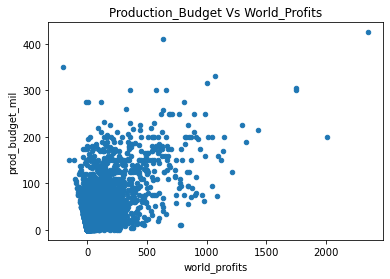

In [19]:
world_plot = budget_df.plot(kind ='scatter', x= 'world_profits', y= 'prod_budget_mil')
world_plot.set_title("Production_Budget Vs World_Profits");

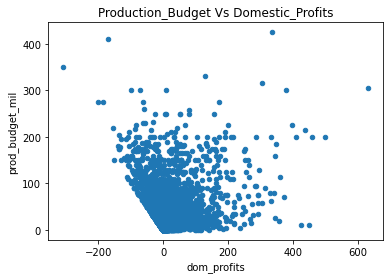

In [20]:
domestic_plot = budget_df.plot(kind ='scatter', x= 'dom_profits', y= 'prod_budget_mil');
domestic_plot.set_title("Production_Budget Vs Domestic_Profits");


To read from the data from imdb, we have to first create a connection to the database by invoking pd.read_sql()

In [21]:
conn = sqlite3.connect('zippedData/im.db')

In [61]:
#genres column is useful and will be selected when joining the tables
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


We can check if any of the movies from the csv data is contained in the movie_basics table:

In [23]:
movie_basics[movie_basics['primary_title'] == 'Avatar']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror


In [24]:
movie_basics[movie_basics['primary_title'] == 'Avengers: Age of Ultron']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
39010,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"


In [25]:
movie_basics[movie_basics['primary_title'] == 'Red 11']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
127755,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


It is evident that the movie_basics database is related to the budget_df dataframe and hence we will have to find a way to merge the two in order  to analyze our data

In [60]:
#primary_name column useful and will be selected when joining the tables
persons = pd.read_sql("SELECT * FROM persons;", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [62]:
#does not contain any useful information for the analysis
directors = pd.read_sql("SELECT * FROM directors;", conn)
directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [28]:
#does not contain any useful information for the analysis
writers = pd.read_sql("SELECT * FROM writers;", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [29]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [63]:
#does not contain any useful information for the analysis
movie_akas = pd.read_sql("SELECT * FROM movie_akas;", conn)
movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [31]:
# will use the table to select movie crew associated with high grossing movies
known_for = pd.read_sql("SELECT * FROM known_for;", conn)
known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [32]:
# will use table to select the job categories of the movie crew
principals= pd.read_sql("SELECT * FROM principals;", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


We are going to make use of SQL JOINS to create table relations.
We will join the **movie basics, movie rating, persons,writers, known for and directors tables**

In [33]:
imdb_crew = pd.read_sql(''' SELECT
                               person_id,
                               movie_id,
                               primary_name,
                               category
                    
                        FROM persons
                        JOIN principals
                        USING (person_id)
;''', conn)

imdb_crew

,person_id,movie_id,primary_name,category
0,nm0061671,tt2398241,Mary Ellen Bauder,producer
1,nm0061865,tt0433397,Joseph Bauer,composer
2,nm0061865,tt1681372,Joseph Bauer,composer
3,nm0061865,tt2281215,Joseph Bauer,composer
4,nm0061865,tt2387710,Joseph Bauer,composer
...,...,...,...,...
1027907,nm9990381,tt6527982,Susan Grobes,actress
1027908,nm9990690,tt8737130,Joo Yeon So,actress
1027909,nm9991320,tt8734436,Madeline Smith,actress
1027910,nm9991786,tt8739240,Michelle Modigliani,producer


In [34]:
ratings = pd.read_sql('''SELECT 
                        movie_id,
                        primary_title,
                        genres,
                       averagerating
                       FROM movie_basics
                        JOIN movie_ratings
                        USING(movie_id);''', conn)
ratings

,movie_id,primary_title,genres,averagerating
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,Drama,6.9
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5
...,...,...,...,...
73851,tt9913084,Diabolik sono io,Documentary,6.2
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",8.7
73853,tt9914642,Albatross,Documentary,8.5
73854,tt9914942,La vida sense la Sara Amat,None,6.6


In [35]:
merged = pd.merge(ratings, imdb_crew) 
merged

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer
...,...,...,...,...,...,...,...
629593,tt9916160,Drømmeland,Documentary,6.5,nm4241788,Tobias Borkert,composer
629594,tt9916160,Drømmeland,Documentary,6.5,nm3256778,Tom Denoyette,editor
629595,tt9916160,Drømmeland,Documentary,6.5,nm6969694,Rogier Timmermans,cinematographer
629596,tt9916160,Drømmeland,Documentary,6.5,nm6460816,Nils Leidal,self


In [36]:
joined_df = merged.join(budget_df, how = 'outer')
joined_df

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-307.237650,-200.237650
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,tt9916160,Drømmeland,Documentary,6.5,nm4241788,Tobias Borkert,composer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629594,tt9916160,Drømmeland,Documentary,6.5,nm3256778,Tom Denoyette,editor,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629595,tt9916160,Drømmeland,Documentary,6.5,nm6969694,Rogier Timmermans,cinematographer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629596,tt9916160,Drømmeland,Documentary,6.5,nm6460816,Nils Leidal,self,NaT,NaN,NaN,NaN,NaN,NaN,NaN


**Check for missing values in the joined dataset**

In [37]:
joined_df.isna()

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,False,False,False,False,False,False,False,True,True,True,True,True,True,True
629594,False,False,False,False,False,False,False,True,True,True,True,True,True,True
629595,False,False,False,False,False,False,False,True,True,True,True,True,True,True
629596,False,False,False,False,False,False,False,True,True,True,True,True,True,True


In [38]:
joined_df.isna().sum()

movie_id                0
primary_title           0
genres               5140
averagerating           0
person_id               0
primary_name            0
category                0
release_date       623816
movie              623816
prod_budget_mil    623816
dom_gross_mil      623816
world_gross_mil    623816
dom_profits        623816
world_profits      623816
dtype: int64

Since there is a very very large occurrence of missing values, it will be advisable to drop all the missing value occurrencews (rows). Since there are missing values represented by 'NaT', we have to first convert them into NaN in order to drop them.

In [39]:
joined_df.replace('NaT', np.NaN)
joined_df

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0,760.507625,2776.345279,335.507625,2351.345279
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,-169.536125,635.063875
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-307.237650,-200.237650
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,tt9916160,Drømmeland,Documentary,6.5,nm4241788,Tobias Borkert,composer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629594,tt9916160,Drømmeland,Documentary,6.5,nm3256778,Tom Denoyette,editor,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629595,tt9916160,Drømmeland,Documentary,6.5,nm6969694,Rogier Timmermans,cinematographer,NaT,NaN,NaN,NaN,NaN,NaN,NaN
629596,tt9916160,Drømmeland,Documentary,6.5,nm6460816,Nils Leidal,self,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# drop the null values
joined_df.dropna(inplace =True)
joined_df

,movie_id,primary_title,genres,averagerating,person_id,primary_name,category,release_date,movie,prod_budget_mil,dom_gross_mil,world_gross_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0347899,Gulzar,writer,2009-12-18,Avatar,425.0000,760.507625,2776.345279,335.507625,2351.345279
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm1194313,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,241.063875,1045.663875,-169.536125,635.063875
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0712540,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0000,42.762350,149.762350,-307.237650,-200.237650
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0904537,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6000,459.005868,1403.013963,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,nm0023551,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,620.181382,1316.721747,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,tt10088006,Free Spirit,Drama,7.4,nm3807784,Emil Nava,director,2018-12-31,Red 11,0.0070,0.000000,0.000000,-0.007000,-0.007000
5778,tt10088006,Free Spirit,Drama,7.4,nm5153682,David James,writer,1999-04-02,Following,0.0060,0.048482,0.240495,0.042482,0.234495
5779,tt10088006,Free Spirit,Drama,7.4,nm5795819,Jahking Guillory,actor,2005-07-13,Return to the Land of Wonders,0.0050,0.001338,0.001338,-0.003662,-0.003662
5780,tt10088006,Free Spirit,Drama,7.4,nm7534845,Amy James,producer,2015-09-29,A Plague So Pleasant,0.0014,0.000000,0.000000,-0.001400,-0.001400


In [41]:
joined_df.isna().sum()

movie_id           0
primary_title      0
genres             0
averagerating      0
person_id          0
primary_name       0
category           0
release_date       0
movie              0
prod_budget_mil    0
dom_gross_mil      0
world_gross_mil    0
dom_profits        0
world_profits      0
dtype: int64

In [74]:
joined_df.describe()

,averagerating,prod_budget_mil,dom_profits,world_profits
count,5743.000000,5743.000000,5743.000000,5743.000000
mean,6.244942,31.027078,10.129767,58.304831
std,1.371297,41.227694,49.268044,143.261888
min,1.700000,0.001100,-307.237650,-200.237650
25%,5.500000,5.000000,-9.100000,-2.240753
50%,6.400000,17.000000,-0.347551,8.336997
75%,7.200000,40.000000,17.600572,59.628811
max,9.400000,425.000000,630.662225,2351.345279


In [42]:
# grouped_df = joined_df.groupby(['movie','genres','world_profits']).mean().sort_values(by = 'world_profits', ascending = False)
# grouped_df

In [43]:
joined_df = joined_df.drop(columns = ['person_id', 'dom_gross_mil', 'world_gross_mil'])
joined_df

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Gulzar,writer,2009-12-18,Avatar,425.0000,335.507625,2351.345279
1,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Mahasweta Devi,writer,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6000,-169.536125,635.063875
2,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Harnam Singh Rawail,director,2019-06-07,Dark Phoenix,350.0000,-307.237650,-200.237650
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6000,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0000,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...
5777,tt10088006,Free Spirit,Drama,7.4,Emil Nava,director,2018-12-31,Red 11,0.0070,-0.007000,-0.007000
5778,tt10088006,Free Spirit,Drama,7.4,David James,writer,1999-04-02,Following,0.0060,0.042482,0.234495
5779,tt10088006,Free Spirit,Drama,7.4,Jahking Guillory,actor,2005-07-13,Return to the Land of Wonders,0.0050,-0.003662,-0.003662
5780,tt10088006,Free Spirit,Drama,7.4,Amy James,producer,2015-09-29,A Plague So Pleasant,0.0014,-0.001400,-0.001400


In [79]:
joined_df['genres'].value_counts().tail(40)

Drama,Mystery,War                10
Family,Sport                     10
Animation,Family                 10
Animation,Family,Fantasy         10
Mystery,Thriller                 10
Action,Drama,Family              10
Drama,Fantasy,Thriller           10
Biography,Comedy,Crime           10
Adventure,Drama,Fantasy          10
Adventure,Horror,Thriller        10
Drama,Musical,Romance            10
Drama,Fantasy,Romance            10
Drama,Romance,Sci-Fi             10
Western                          10
Comedy,Music,Romance              9
Comedy,Fantasy                    9
Biography,Documentary,Music       9
Crime,Drama,Romance               9
Animation,Crime,Music             9
Horror,Mystery                    9
Action,Drama,Sport                9
Adventure,Comedy                  9
Comedy,Drama,War                  9
Horror,Mystery,Romance            9
Comedy,Musical,Romance            9
Drama,Sport                       8
Action,Crime,Horror               8
Drama,Sci-Fi                

In [77]:
joined_df[joined_df['genres'] == 'Family']

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
5203,tt10024716,Aghavan,Family,7.9,Ezhumalai,director,2009-04-07,Faith Like Potatoes,1.100,-1.100000,-1.100000
5204,tt10024716,Aghavan,Family,7.9,Kishore,actor,2010-03-23,Lake Mungo,1.100,-1.100000,-1.100000
5205,tt10024716,Aghavan,Family,7.9,Thambi Ramayya,actor,2015-04-07,Silent Running,1.100,-1.100000,-1.100000
5206,tt10024716,Aghavan,Family,7.9,R.N.R. Manohar,actor,2010-12-31,The Dead Undead,1.100,-1.100000,-1.100000
5207,tt10024716,Aghavan,Family,7.9,Chirashree Anchan,actress,2013-12-31,The Vatican Exorcisms,1.100,-1.100000,-1.100000
5208,tt10024716,Aghavan,Family,7.9,Chinni Jayanth,actor,2009-12-11,Rocket Singh: Salesman of the Year,1.070,-0.905351,4.278767
5209,tt10024716,Aghavan,Family,7.9,Nithya Shetty,actress,1943-01-23,Casablanca,1.039,9.423500,9.457855


In [78]:
joined_df[joined_df['genres'] == 'Animation']

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
4875,tt0996976,The Slimbones,Animation,6.6,Giovonnie Samuels,actress,2005-12-31,Chicken Tikka Masala,2.16,-2.160000,-2.122135
4876,tt0996976,The Slimbones,Animation,6.6,Ron Myrick,director,2008-10-07,Jack Brooks: Monster Slayer,2.15,-2.150000,-2.150000
4877,tt0996976,The Slimbones,Animation,6.6,Ernest Thomas,actor,1946-11-21,The Best Years of Our Lives,2.10,21.500000,21.500000
4878,tt0996976,The Slimbones,Animation,6.6,Eddie Griffin,actor,2001-07-13,Bully,2.10,-1.218176,-0.718176
4879,tt0996976,The Slimbones,Animation,6.6,Daniel Curtis Lee,actor,2002-05-29,Elling,2.10,-1.786564,-1.786564
4880,tt0996976,The Slimbones,Animation,6.6,Courtney Black,writer,2016-10-16,Mi America,2.10,-2.096670,-2.096670
4881,tt0996976,The Slimbones,Animation,6.6,Phil Stapleton,writer,2009-07-14,[Rec],2.10,-2.100000,21.166821
4882,tt0996976,The Slimbones,Animation,6.6,Teri Brown-Jackson,writer,2012-12-31,Infected,2.10,-2.100000,-2.100000
4883,tt0996976,The Slimbones,Animation,6.6,Clayton Thomas,writer,2010-12-31,Lies in Plain Sight,2.10,-2.100000,-2.100000
4884,tt0996976,The Slimbones,Animation,6.6,Daniel B. De Sangre,writer,2015-10-06,The Timber,2.10,-2.100000,-2.100000


In [68]:
dup_values = joined_df['movie'].duplicated().any()
print('Are there any duplicate values?', dup_values)

Are there any duplicate values? True


In [70]:
joined_df['movie'] = joined_df['movie'].drop_duplicates()
joined_df['movie'] 

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5743, dtype: object

In [71]:
horr_thrill= joined_df[joined_df['genres'] == 'Horror,Thriller'].sort_values(by ='world_profits', ascending = False)
horr_thrill 

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
47,tt0112502,Bigfoot,"Horror,Thriller",4.1,Manfred D. Heid,producer,2013-05-03,Iron Man 3,200.0,208.992272,1015.392272
48,tt0112502,Bigfoot,"Horror,Thriller",4.1,Danny Dimbort,producer,2017-05-05,Guardians of the Galaxy Vol 2,200.0,189.813101,662.316233
49,tt0112502,Bigfoot,"Horror,Thriller",4.1,Mc Jones,director,2004-06-30,Spider-Man 2,200.0,173.524485,595.110670
1759,tt0490236,The Invited,"Horror,Thriller",4.2,David Williams,composer,2014-09-19,The Maze Runner,34.0,68.427862,314.319861
835,tt0436230,Mexican Devil,"Horror,Thriller",6.7,Robert Shaw,writer,2014-10-03,Gone Girl,61.0,106.767189,307.567189
...,...,...,...,...,...,...,...,...,...,...,...
1764,tt0490236,The Invited,"Horror,Thriller",4.2,Regan McKinney,writer,1999-09-01,Chill Factor,34.0,-22.736034,-22.736034
1765,tt0490236,The Invited,"Horror,Thriller",4.2,Ryan McKinney,director,1999-08-27,The Astronaut's Wife,34.0,-23.327434,-23.327434
1578,tt0479204,Perfect Life,"Horror,Thriller",4.3,Sienna Guillory,actress,1996-02-02,White Squall,38.0,-27.770700,-27.770700
828,tt0436230,Mexican Devil,"Horror,Thriller",6.7,B-Real,actor,1994-06-24,Wyatt Earp,63.0,-37.948000,-37.948000


In [47]:
adv_ani_com = joined_df[joined_df['genres'] == 'Adventure,Animation,Comedy'].sort_values(by ='world_profits', ascending = False)
adv_ani_com


,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
824,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,Tim Allen,actor,1993-06-11,Jurassic Park,63.0,332.708305,975.812584
51,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",8.1,John R. Taylor,production_designer,2012-11-08,Skyfall,200.0,104.360277,910.526981
50,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",8.1,Jim Wallace,producer,2010-03-05,Alice in Wonderland,200.0,134.191110,825.491110
537,tt0398286,Tangled,"Adventure,Animation,Comedy",7.8,Byron Howard,director,2012-03-23,The Hunger Games,80.0,328.010692,597.923379
58,tt0137204,Joe Finds Grace,"Adventure,Animation,Comedy",8.1,Kevin MacLeod,composer,2009-11-13,2012,200.0,-33.887833,557.677748
...,...,...,...,...,...,...,...,...,...,...,...
3151,tt0851471,Sir Billi,"Adventure,Animation,Comedy",4.2,Tessa Hartmann,writer,2002-10-25,All the Queen's Men,15.0,-14.977277,-14.977277
3152,tt0851471,Sir Billi,"Adventure,Animation,Comedy",4.2,Sascha Hartmann,director,2007-10-05,The Good Night,15.0,-14.977559,-14.977559
818,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,Joan Cusack,actress,2005-09-23,Oliver Twist,65.0,-62.929080,-38.329080
820,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3,Tom Hanks,actor,2018-10-26,Air Strike,65.0,-65.000000,-64.483721


In [72]:
act_com_drama = joined_df[joined_df['genres'] == 'Action,Crime,Drama'].sort_values(by ='world_profits', ascending = False)
act_com_drama

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Gulzar,writer,2009-12-18,Avatar,425.0,335.507625,2351.345279
6,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Naushad,composer,2018-04-27,Avengers: Infinity War,300.0,378.815482,1748.134200
5,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Balraj Sahni,actor,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,630.662225,1747.311220
3,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Vyjayanthimala,actress,2015-05-01,Avengers: Age of Ultron,330.6,128.405868,1072.413963
4,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,Abrar Alvi,writer,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,303.181382,999.721747
...,...,...,...,...,...,...,...,...,...,...,...
2698,tt0817545,The Power of Few,"Action,Crime,Drama",5.2,Juvenile,actor,2005-04-22,The Game of Their Lives,20.0,-19.624526,-19.624526
254,tt0315642,Wazir,"Action,Crime,Drama",7.1,Aditi Rao Hydari,actress,2013-07-19,R.I.P.D.,130.0,-96.381145,-50.923322
434,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,Lawrence Block,writer,2004-04-09,The Alamo,92.0,-69.593638,-68.088638
435,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,Scott Frank,director,1995-12-22,Cutthroat Island,92.0,-81.982678,-73.482678


C:\Users\LENOVO\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LENOVO\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LENOVO\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


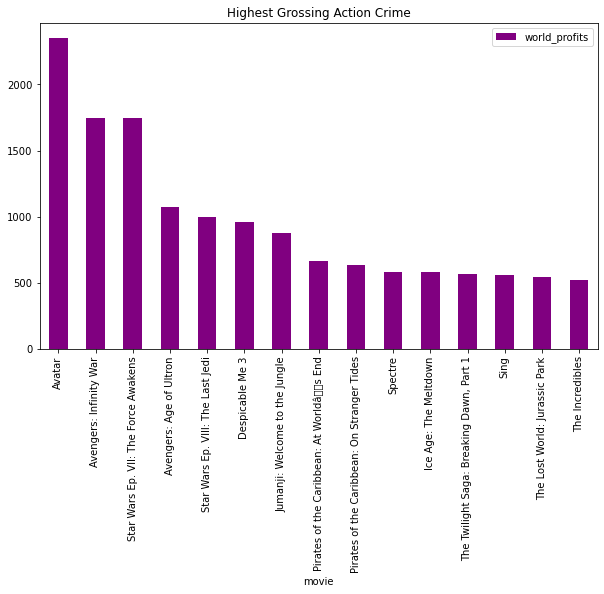

In [49]:
act_com_drama.head(15).plot('movie','world_profits',kind ='bar',figsize =(10,6), title = 'Highest Grossing Action Crime',color ='purple');

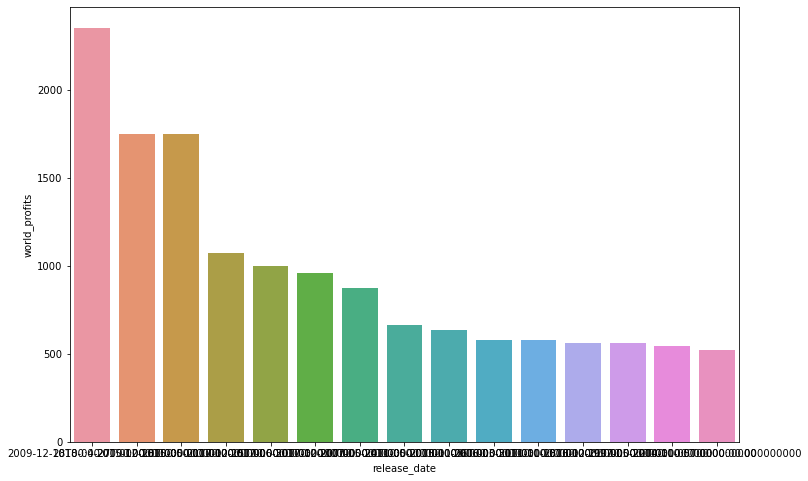

In [88]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x='release_date', y= 'world_profits', data = act_com_drama.head(15))

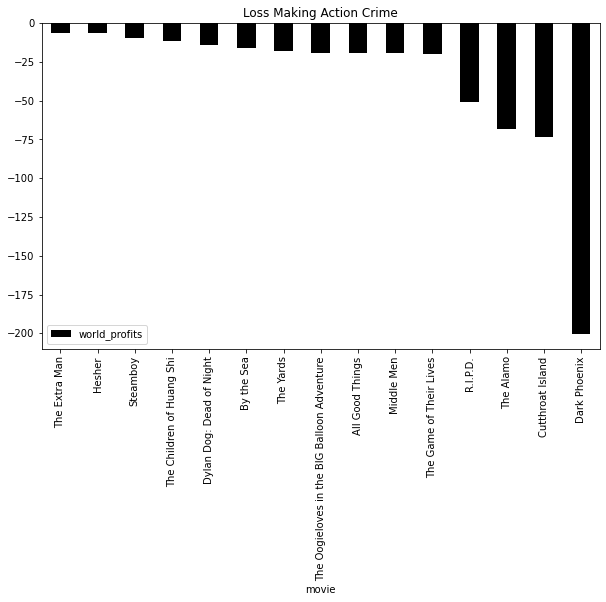

In [50]:
act_com_drama.tail(15).plot('movie','world_profits',kind ='bar',figsize =(10,6), title = 'Loss Making Action Crime',color ='black');

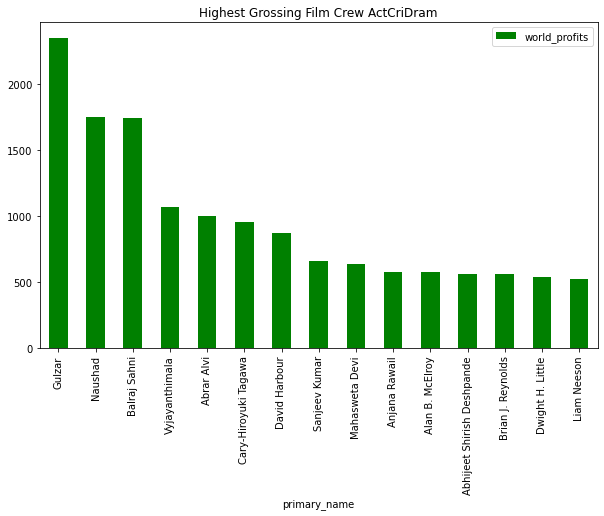

In [51]:
act_com_drama.head(15).plot('primary_name','world_profits',kind ='bar',figsize =(10,6), title = 'Highest Grossing Film Crew ActCriDram',color ='green');

In [52]:
drama = joined_df[joined_df['genres'] == 'Drama'].sort_values(by ='world_profits', ascending = False)
drama

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
66,tt0146592,Pál Adrienn,Drama,6.8,Ferenc Pusztai,producer,2015-04-03,Furious 7,190.0,163.007020,1328.722794
26,tt0069049,The Other Side of the Wind,Drama,6.9,Orson Welles,director,2012-05-04,The Avengers,225.0,398.279547,1292.935897
112,tt0192528,Heaven & Hell,Drama,4.0,Jacques Hébert,production_designer,2018-06-22,Jurassic World: Fallen Kingdom,170.0,247.719760,1135.772799
22,tt0069049,The Other Side of the Wind,Drama,6.9,Peter Bogdanovich,actor,2017-04-14,The Fate of the Furious,250.0,-24.235235,984.846267
95,tt0162942,Children of the Green Dragon,Drama,6.9,Eszter Bánfalvi,actress,2019-03-08,Captain Marvel,175.0,251.525952,948.061550
...,...,...,...,...,...,...,...,...,...,...,...
1208,tt0460809,The Grasslands,Drama,8.6,Christopher J. Kito,producer,2019-09-20,Ad Astra,49.8,-49.800000,-49.800000
1207,tt0460809,The Grasslands,Drama,8.6,Ron Wolf,cinematographer,2019-11-22,The Rhythm Section,50.0,-50.000000,-50.000000
1205,tt0460809,The Grasslands,Drama,8.6,Peter Greene,actor,2020-12-31,Hannibal the Conqueror,50.0,-50.000000,-50.000000
1206,tt0460809,The Grasslands,Drama,8.6,Vincent Framularo,producer,2019-11-08,Arctic Dogs,50.0,-50.000000,-50.000000


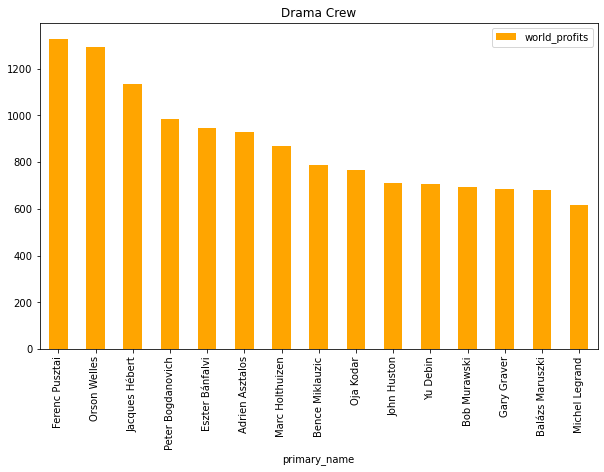

In [53]:
drama.head(15).plot('primary_name','world_profits',kind ='bar',figsize =(10,6), title = 'Drama Crew', color ='orange');

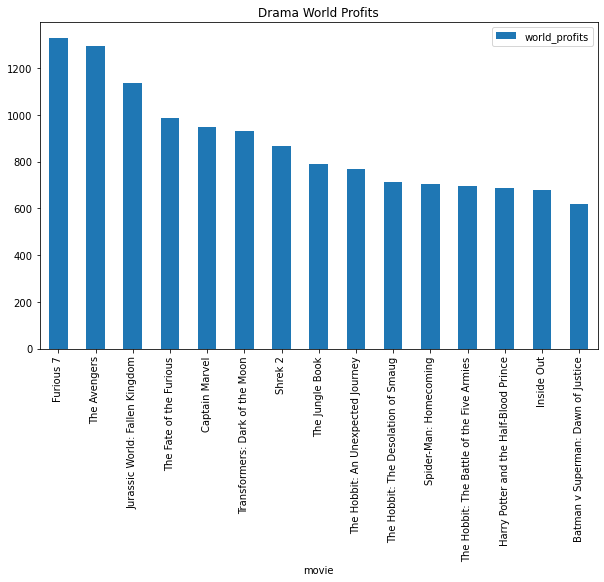

In [54]:
drama.head(15).plot('movie','world_profits',kind ='bar',figsize =(10,6), title = 'Drama World Profits');

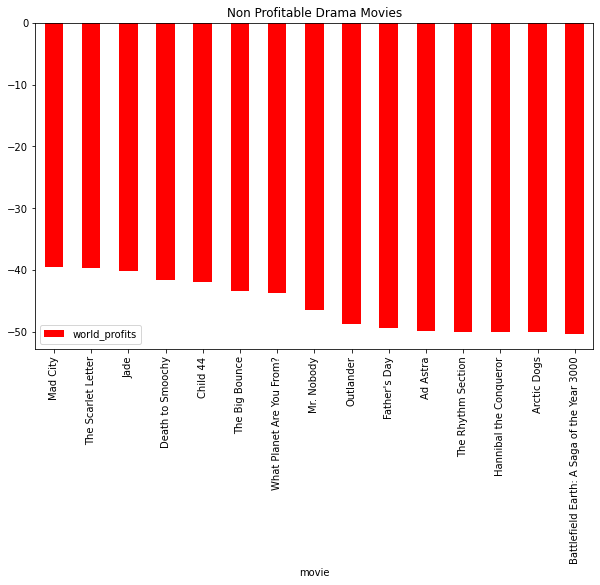

In [73]:
drama.tail(15).plot('movie','world_profits',kind ='bar',figsize =(10,6), title = 'Non Profitable Drama Movies', color ='red');

In [56]:
Documentary = joined_df[joined_df['genres'] == 'Documentary'].sort_values(by ='world_profits', ascending = False)
Documentary


,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
218,tt0285423,Abolição,Documentary,7.4,Agnaldo Timóteo,self,2002-05-03,Spider-Man,139.0,264.706375,682.706375
81,tt0159369,Cooper and Hemingway: The True Gen,Documentary,7.6,Nancy Crawford,actress,2017-11-03,Thor: Ragnarok,180.0,135.058289,666.980024
84,tt0159369,Cooper and Hemingway: The True Gen,Documentary,7.6,Len Cariou,actor,2016-11-18,Fantastic Beasts and Where to Find Them,180.0,54.037575,622.402853
83,tt0159369,Cooper and Hemingway: The True Gen,Documentary,7.6,Byron Janis,composer,2014-05-30,Maleficent,180.0,61.407328,578.536735
99,tt0170651,T.G.M. - osvoboditel,Documentary,7.5,Vera Chytilová,director,2016-08-05,Suicide Squad,175.0,150.100054,571.059887
...,...,...,...,...,...,...,...,...,...,...,...
1180,tt0460528,One Step Beyond: The True Story of Géraldine F...,Documentary,8.5,Tony Hawk,self,2016-06-24,Free State of Jones,50.0,-29.189964,-26.762748
1182,tt0460528,One Step Beyond: The True Story of Géraldine F...,Documentary,8.5,Kris Markovich,self,2005-02-25,Man of the House,50.0,-30.300294,-27.900294
748,tt0430524,The Rescuer,Documentary,8.7,Leo Grillo,director,2010-05-28,Agora,70.0,-69.380577,-31.007708
1187,tt0460528,One Step Beyond: The True Story of Géraldine F...,Documentary,8.5,Karina Hollekim,self,1994-07-01,Baby's Day Out,50.0,-33.418425,-33.418425


In [57]:
Comedy= joined_df[joined_df['genres'] == 'Comedy'].sort_values(by ='world_profits', ascending = False)
Comedy

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
1067,tt0452664,Party Crashers,Comedy,5.4,Rafael Dragaud,writer,2008-07-18,Mamma Mia!,52.0,92.130063,563.748772
205,tt0285252,Life's a Beach,Comedy,3.9,Richard Gilbert Abramson,producer,2003-07-09,Pirates of the Caribbean: The Curse of the Bla...,140.0,165.411224,494.954103
3340,tt0870208,Touch Wood,Comedy,8.7,Cyrcee Perreault,actress,1975-06-20,Jaws,12.0,248.000000,458.700000
3341,tt0871891,The Nightclub Days,Comedy,5.0,John Biggins,cinematographer,1973-12-26,The Exorcist,12.0,218.347346,416.214478
207,tt0285252,Life's a Beach,Comedy,3.9,Darren Geare,actor,1998-07-01,Armageddon,140.0,61.578182,414.600000
...,...,...,...,...,...,...,...,...,...,...,...
1512,tt0476023,Stiffs,Comedy,7.3,Sandy Missakian,producer,2002-08-30,FearDotCom,40.0,-26.791977,-26.791977
1513,tt0476023,Stiffs,Comedy,7.3,Giuliano Taviani,composer,2008-11-07,Soul Men,40.0,-27.917609,-27.654117
1064,tt0452664,Party Crashers,Comedy,5.4,Andrucha Waddington,director,1998-10-16,Beloved,53.0,-30.147513,-30.147513
766,tt0432010,The Queen of Sheba Meets the Atom Man,Comedy,7.1,Judith Malina,actress,2007-08-17,The Last Legion,67.0,-61.067940,-41.642229


In [58]:
com_dr_rom = joined_df[joined_df['genres'] == 'Comedy,Drama,Romance'].sort_values(by ='world_profits', ascending = False)
com_dr_rom

,movie_id,primary_title,genres,averagerating,primary_name,category,release_date,movie,prod_budget_mil,dom_profits,world_profits
425,tt0365545,Nappily Ever After,"Comedy,Drama,Romance",6.4,Tracey Bing,producer,2003-12-17,The Lord of the Rings: The Return of the King,94.0,283.845905,1047.403341
424,tt0365545,Nappily Ever After,"Comedy,Drama,Romance",6.4,Sanaa Lathan,actress,2003-05-30,Finding Nemo,94.0,286.529370,842.429370
426,tt0365545,Nappily Ever After,"Comedy,Drama,Romance",6.4,Lyriq Bent,actor,2002-12-18,The Lord of the Rings: The Two Towers,94.0,248.548984,840.699645
1783,tt0491152,Something Borrowed,"Comedy,Drama,Romance",5.9,Colin Egglesfield,actor,1983-05-25,Star Wars Ep. VI: Return of the Jedi,32.5,276.705079,540.205079
430,tt0365545,Nappily Ever After,"Comedy,Drama,Romance",6.4,Jared LeBoff,producer,2011-08-05,Rise of the Planet of the Apes,93.0,83.760185,377.986200
...,...,...,...,...,...,...,...,...,...,...,...
1779,tt0491152,Something Borrowed,"Comedy,Drama,Romance",5.9,John Krasinski,actor,1999-04-23,Pushing Tin,33.0,-24.591165,-24.591165
967,tt0446792,Surviving in L.A.,"Comedy,Drama,Romance",8.7,Charlie Campbell,production_designer,2008-12-12,"Che, Part 1: The Argentine",58.0,-56.197479,-26.372630
1781,tt0491152,Something Borrowed,"Comedy,Drama,Romance",5.9,Aaron Lubin,producer,2015-07-31,The Young and Prodigious T.S. Spivet,33.0,-32.823153,-32.642313
1782,tt0491152,Something Borrowed,"Comedy,Drama,Romance",5.9,Ginnifer Goodwin,actress,2015-10-30,Freaks of Nature,33.0,-32.929042,-32.929042


In [59]:
# grouped_df1 = joined_df.groupby(['genres','primary_name', 'category']).mean().sort_values(by = 'world_profits', ascending = False)
# grouped_df1

# **FINDINGS**

funding/prod budgets
most profitable
The film-making process is a machine with many running parts. If you want to successfully make a film, you will need a great film production team.
The main departments that you will have on your film production team are the key creative team (which you will be part of as the producer), the production department, the art department, the location department, the camera and lighting department, the sound department, and the post-production department.

# **AREAS OF FURTHER STUDY**
Underlying factors that lead to high rois, not just production cost
Actors role, the data sets did not have lead actors/starring
One of the major business issues regarding the movie sphere concerns the uncontrollability of the product – or, to be more exact, the effect that the product is going to have on the audience
Social trends and movie vierwship -people nowadays go to cinemas
marketing-online trailers 
effects of piracy on the movie industry
 critical reception

# **CONCLUSIONS**

# **RECOMMENDATIONS**



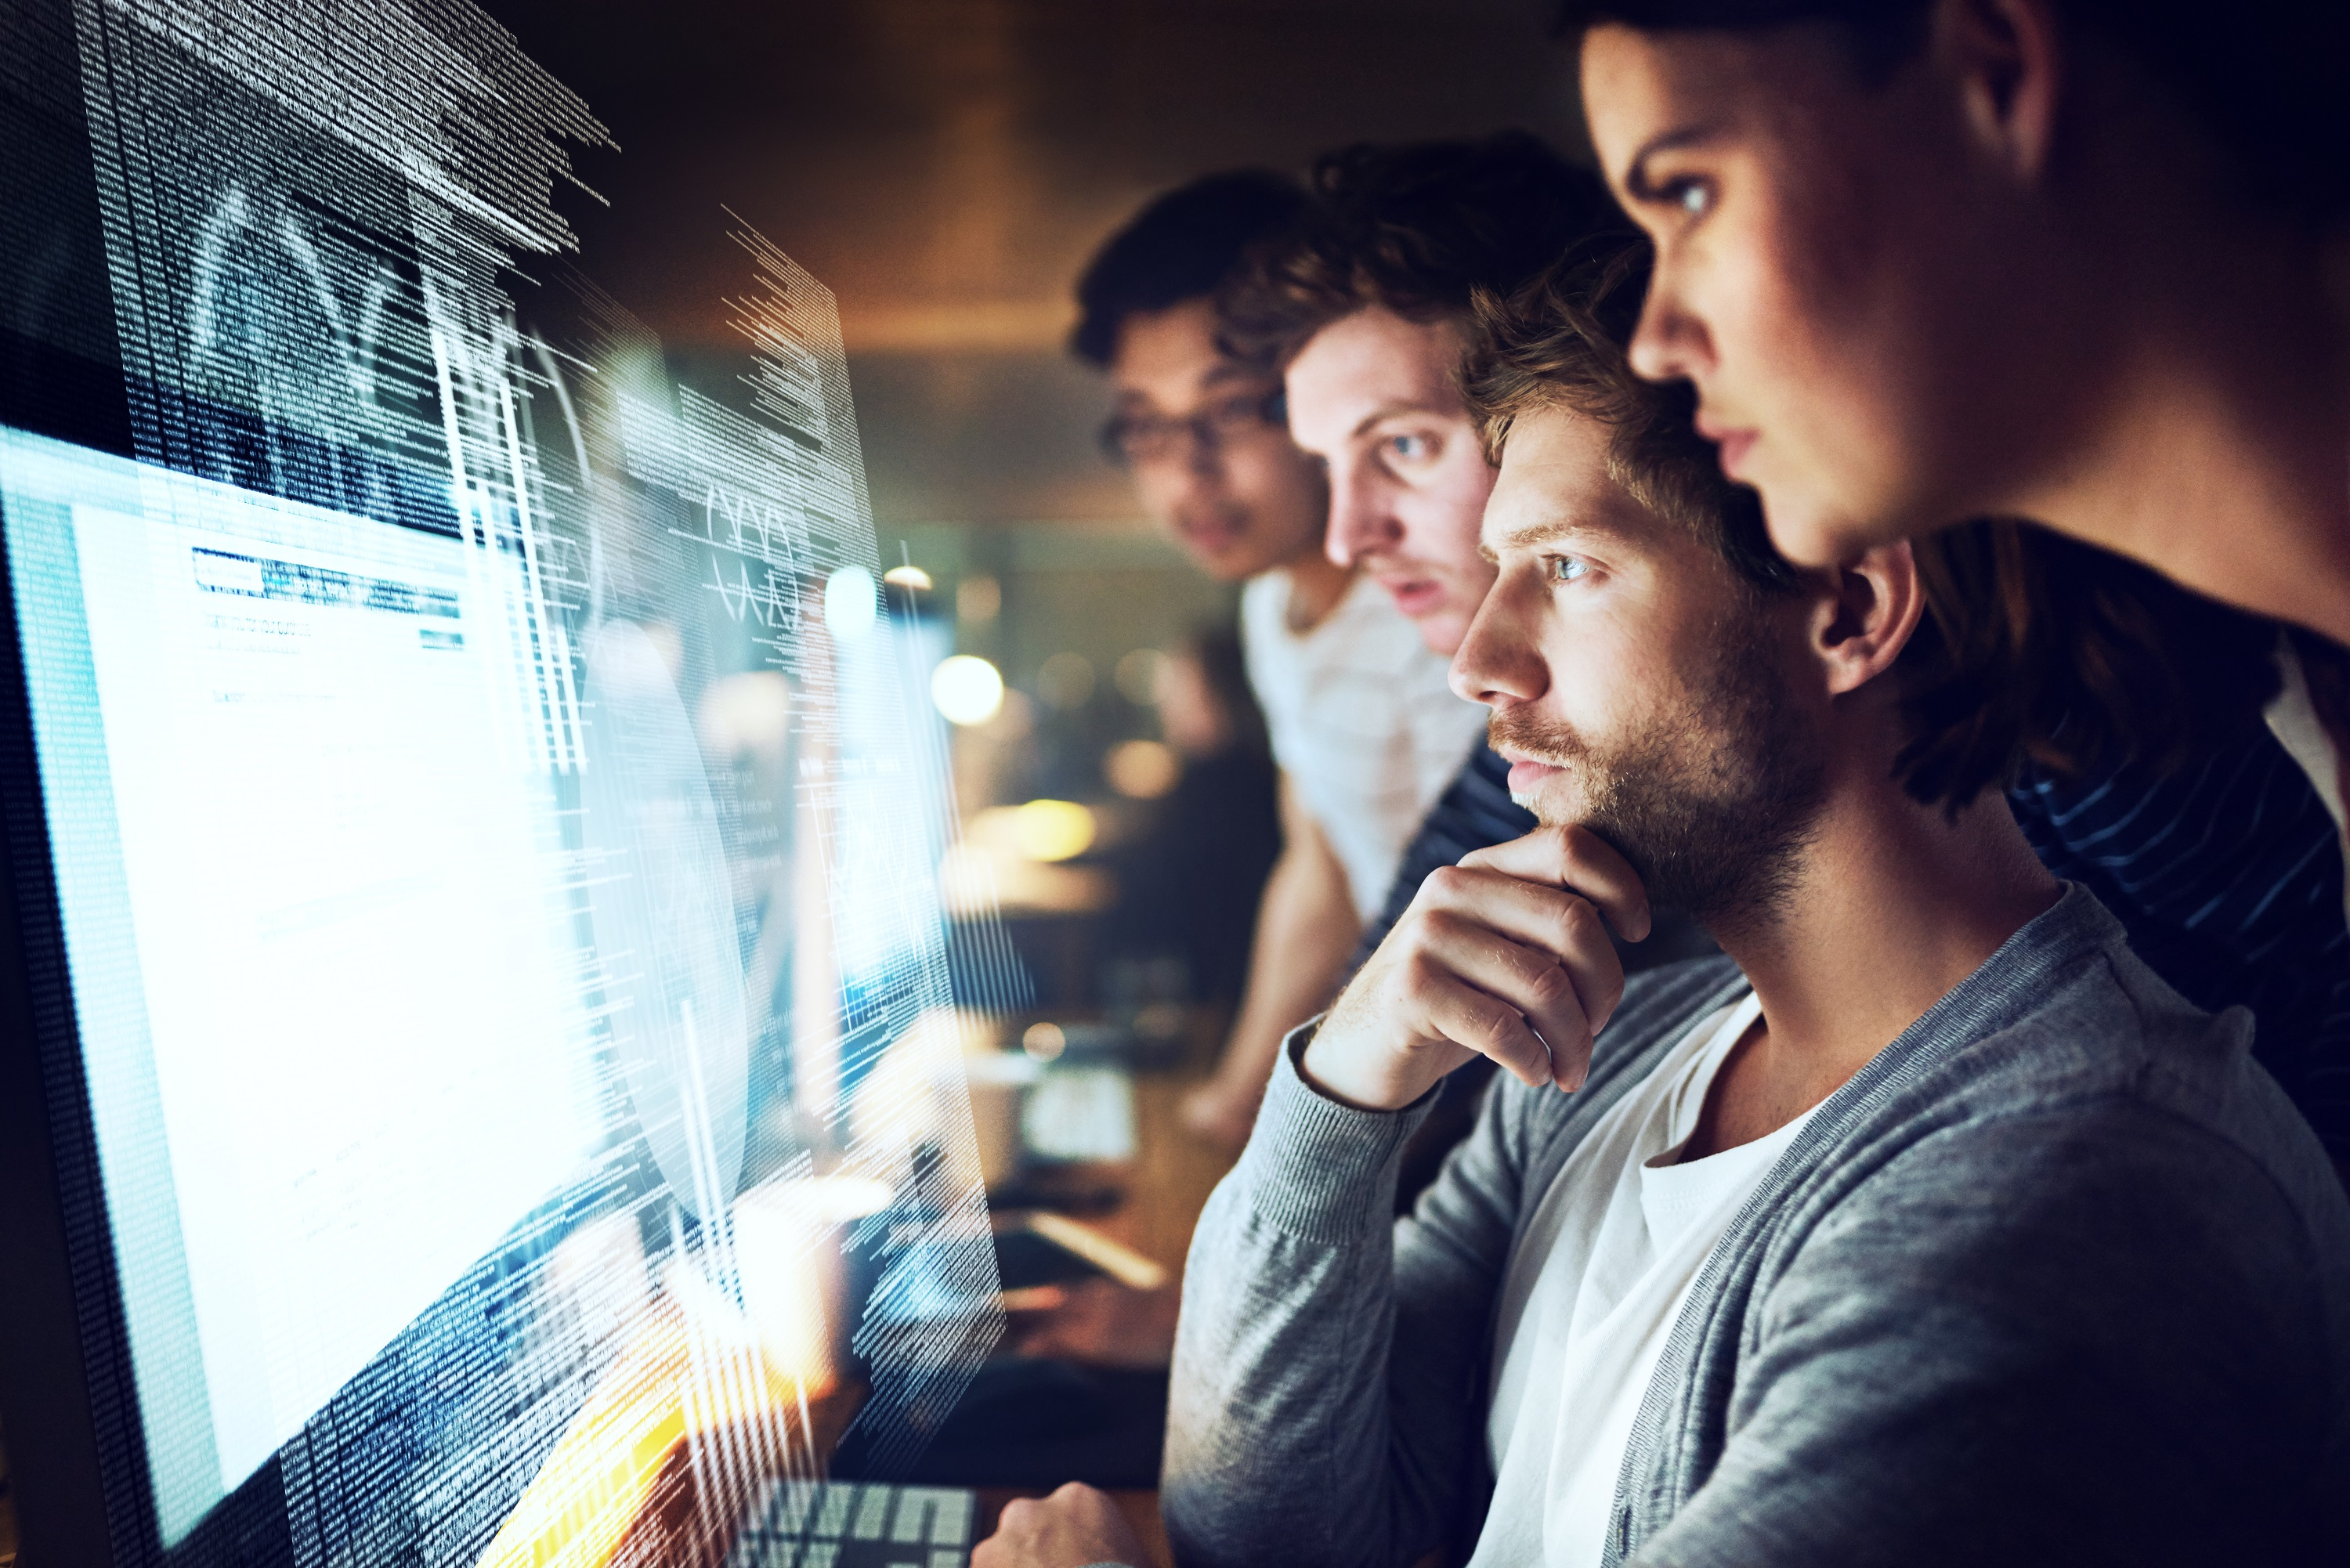

Filmmaking is both a commercial and artistic venture, microsofts are among the industry leaders in tech  industry from  advanced cloud and AI tools to build their own digital solutions, hence action movies are best,
OPen a studio-Recognize the role the major Hollywood studios have in shaping the movie industry today.publicity and product
studio-generated marketing and publicity